# Настройка ноутбука

In [17]:
import pandas as pd
import numpy as np
import datetime as dt

import scipy.stats as st

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [18]:
# Расширить рабочее поле ноутбука на весь экран
from IPython.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

# Описание

**Курс:**
- [Stepik: Основы статистики ч.1 - Нормальное распределение](https://stepik.org/lesson/9166?unit=1828)

**Видео:**
- [StatQuest: The Normal Distribution, Clearly Explained!!!](https://www.youtube.com/watch?v=rzFX5NWojp0&ab_channel=StatQuestwithJoshStarmer)
- [StatQuest: Quantile-Quantile Plots (QQ plots), Clearly Explained!!!](https://www.youtube.com/watch?v=okjYjClSjOg)
- [Основы ЦОС: Шум как случайный процесс](https://www.youtube.com/watch?v=c5mG7jv0JgA&list=PLmu_y3-DV2_kpP8oX_Uug0IbgH2T4hRPL&index=15)

# Концепты

## Нормальное распределение

<img src="../data/img/normal_distribution.png" width="600">

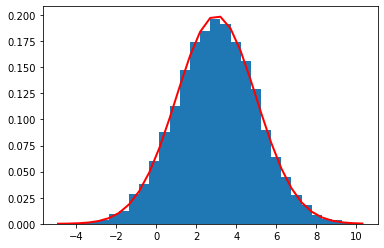

In [19]:
m = 3 # mean value - среднее значение
sigma = 2 # standart deviation - стандартное отклонение

# Сгенерим нашу генеральную совокупность
s = np.random.normal(m, sigma, 10000) # сренерируем набор случайных чисел, с нормальных распределением. 

count, bins, ignored = plt.hist(s, 30, density=True) # нарисуем график функции плотности случайной величины

plt.plot(bins, 1/(sigma * np.sqrt(2 * np.pi)) *np.exp( - (bins - m)**2 / (2 * sigma**2) ),linewidth=2, color='r')
plt.show()

Если дисперсия невелика, то вероятность встретить значения, сильно отличающиеся от среднего, мала, и наоборот.

In [20]:
m = 3
sigma = 2 # standart deviation - стандартное отклонение

### Наложение равновероятных величин

Почему, например, низких и высоких людей гораздо меньше чем средних? Дело в том, что рост зависит от множества факторов со сложной историей, которые можно представлять как шум. Попробуйте задать массив случайных чисел с равномерным распределением и постройте его гистограмму. Затем, приплюсуйте к нему новый рандомный массив. И еще, и еще... Тогда можно заметить, как гистограмма постепенно принимает вид нормального распределения. 

Это очень круто. Бывает, у некоторых возникает суеверный экстаз, когда им говорят, что для многих явлений свойственны схожие зависимости, а оказывается, что здесь работает банальная математика

---

Тоесть, допустип мы сделали 1 000 000 измерений какого-нибудь процесса. Значение измерения зависит от множества факторов - тоесть равно сумме значений этих факторов. При этом каждый фактор имеет равномерное распределение, тоесть с равной вероятностью принимает любое значение от 0 до 1.

In [21]:
d = 1_000_000
heights = np.array([0.0] * d)

При выполнении следующей ячейки мы добавляем новый фактор к процессу и смотрим финальное распределение значений:

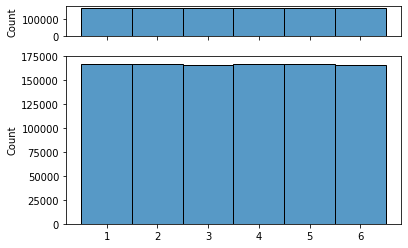

In [22]:
# Дискретные случаи
# factor = np.random.randint(low=0, high=2, size=(d,)) # аналог подбрасывания n-го количества монеток с суммированием орлов
factor = np.random.randint(low=1, high=7, size=(d,)) # агалог подрбрасывания n-го количества костей с суммированием очков

# Непрерывные случаи
# factor = np.random.uniform(low=0, high=1, size=(d,))

heights += factor

f, (ax_factors, ax_heights) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)})

sns.histplot(x=factor, ax = ax_factors, discrete=True)
sns.histplot(
    x=heights, 
    ax = ax_heights,
    discrete=True
);

Таким образом, чем больше равновероятных факторов в процессе (шумов), тем ближе его распределение к нормальному. Однако, остается вопрос - почему так происходит?

## Z-значение

Z - преобразование часто используется, чтобы все наблюдения перевести в z - шкалу (M = 0, sd = 1) для упрощения работы с данными.

<img src="../data/img/z-value_1.png" width="200">

<img src="../data/img/z-value_2.png" width="200">

### Рассчет z-значения

In [23]:
df = pd.DataFrame(np.random.randint(100, 200, size=(5, 3)), columns=['A', 'B', 'C'])
df

,A,B,C
0,183,182,165
1,110,120,117
2,197,101,106
3,126,117,137
4,193,160,117


In [28]:
(df - df.mean())/df.std(ddof=0)

,A,B,C
0,0.582330,1.527573,1.754755
1,-1.422862,-0.531330,-0.546563
2,0.966887,-1.162284,-1.073948
3,-0.983368,-0.630954,0.412319
4,0.857014,0.796995,-0.546563


In [24]:
df.apply(st.zscore)

,A,B,C
0,0.582330,1.527573,1.754755
1,-1.422862,-0.531330,-0.546563
2,0.966887,-1.162284,-1.073948
3,-0.983368,-0.630954,0.412319
4,0.857014,0.796995,-0.546563


#### Пример задачи

Допустим, мы измерили рост 1000 человек, данное распределение оказалось нормальным со средним равным 175 и стандартным отклонением равным 8 (M = 175, sd = 8). Рост одного из испытуемых составил 186,2. Чему равняется z - значение, рассчитанное для этого испытуемого?

In [7]:
M = 175
sd = 8
exp = 186.2

In [9]:
round((exp-M)/sd, 2)

1.4

Другими словами, z-преобразование дает понять в скольких стандартных отклонениях находится отдельно взятое значение. Например, человек с ростом 186,2 находится примерно в 1.4 стандартных отклонениях от среднего (1.4*8 = 11,2, именно на столько отличается рост этого человека от среднего).

Если отдельное наблюдение меньше, чем выборочное среднее, то соответствующее z - значение будет отрицательным.

## Правила двух и трех сигм для Нормального распределения

<img src="../data/img/3-sigma.png" width="500">

Mx ± σ ≈ 68.26% наблюдений

Mx ± 2σ ≈ 95.44% наблюдений

Mx ± 3σ ≈ 99.72% наблюдений

- [Сайт для вычисления процента наблюдений в интересующем нас диапазоне](https://gallery.shinyapps.io/dist_calc/)
- [Таблица процент наблюдений, не превышающий указанное z-значение](https://web.archive.org/web/20180729102938/http:/users.stat.ufl.edu/~athienit/Tables/Ztable.pdf)
- [Таблица процент наблюдений, превышающий указанное z-значение](http://www.normaltable.com/ztable-righttailed.html)


#### Пример задач:

Считается, что значение IQ (уровень интеллекта) у людей имеет нормальное распределение со средним значением равным 100 и стандартным отклонением равным 15 (M = 100, sd = 15).

Какой приблизительно процент людей обладает IQ > 125?

In [15]:
import scipy.stats as st

M = 100
std = 15
point = 125

z = abs(point - M) / std
probability_of_point = 1 - st.norm.cdf(z)

display(z)
display(probability_of_point)

1.6666666666666667

0.047790352272814696

Какой приблизительно процент людей обладает IQ  на промежутке от 70 до 112?